In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [3]:

df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [4]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.query("group == 'control'").total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query("group == 'experiment'").total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [5]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [16]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    bot = df.sample(frac=1, replace=True)
    ctr = bot.query("group == 'control'").total_days.mean()
    exp = bot.query("group == 'experiment'").total_days.mean()
    diffs.append(exp - ctr)

In [17]:
diffs

448817417902404,
 0.4445152269268533,
 -0.7436644950233955,
 1.301499903605162,
 1.93850640789924,
 2.084377481043788,
 0.6650092836705426,
 1.4086003719242228,
 0.968532298486366,
 0.3209936446005628,
 1.1767385173809828,
 0.2577380952380963,
 0.3689632465619894,
 0.2763657021385768,
 2.6671162545214315,
 2.583722957642138,
 1.4902531459980963,
 2.504591924420126,
 2.0393160548948686,
 0.7535761045647291,
 1.8755941013773736,
 1.618155816454248,
 0.6436945263192939,
 1.665810976690679,
 1.2177487265798987,
 1.1653358265947418,
 1.3798186487053528,
 1.255225820756948,
 1.5956572769953112,
 1.1218547841261852,
 0.2770999863715815,
 2.325971074517966,
 0.6866249217420943,
 2.3658116178067274,
 0.9861737406055795,
 2.4838433729933342,
 1.319790323469448,
 1.922870305737817,
 2.7815881955023656,
 1.3029646159985333,
 1.78095021453818,
 1.2781268374912287,
 0.8961478487436523,
 0.5269536642750268,
 1.7616107186945698,
 0.5236427831800796,
 0.0493362405602511,
 0.5482889843777912,
 -0.237391

In [18]:
# convert to numpy array
diffs = np.array(diffs)

In [19]:
diffs

array([ 0.83769944,  1.370488  ,  0.88116002, ...,  2.37470039,
        1.72812923, -0.4254543 ])

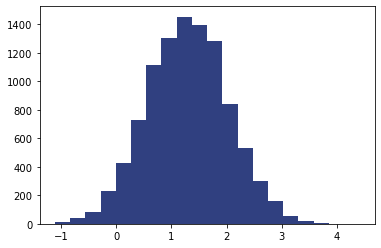

In [27]:
# plot sampling distribution
plt.hist(diffs, bins=20, color='#304080');

In [28]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

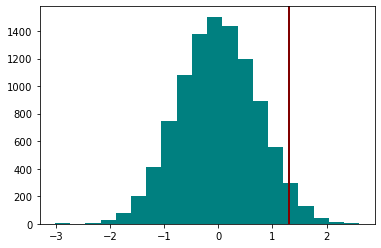

In [30]:
# plot null distribution

plt.hist(null_vals, bins=20, color='#008080')
# plot line for observed statistic
plt.axvline(x=obs_diff, c='#800000', linewidth=2);

In [31]:
# compute p value
p_val = (null_vals > obs_diff).mean()
p_val

0.0366